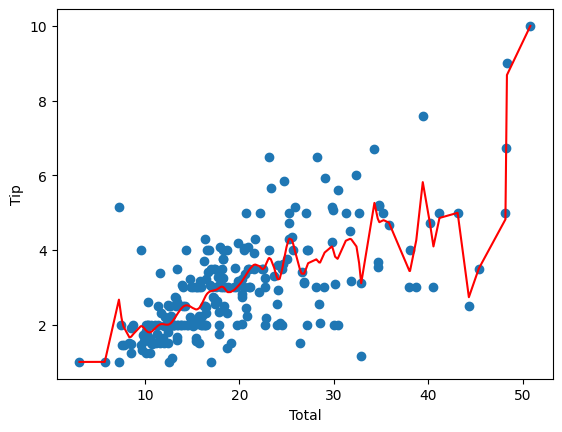

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kernel(point,xmat,k):
    m,n = np.shape(xmat)
    weight = np.mat(np.eye(m))
    for j in range(m):
        diff = point - X[j]
        weight[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weight

def localweight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T * (wei*X)).I * (X.T * (wei*ymat.T))
    return W

def localregression(xmat,ymat,k):
    m,n = np.shape(xmat)
    y_pred = np.zeros(m)
    for j in range(m):
        y_pred[j] = xmat[j] * localweight(xmat[j],xmat,ymat,k)
    return y_pred

def graph(X,y_pred):
    sortedindex = X[:,1].argsort(0)
    xindex = X[sortedindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip)
    ax.plot(xindex[:,1],y_pred[sortedindex], color="red")
    plt.xlabel("Total")
    plt.ylabel("Tip")
    plt.show()

data = pd.read_csv("bill.csv")
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)
m = np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T, mbill.T))
y_pred = localregression(X,mtip,0.5)
graph(X,y_pred)